In [17]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy

In [106]:
T = 2

class Node:
    def __init__(self, pose, node_type="default", capacity=1):
        self.pose = pose
        self.capacity = capacity
        
        self.children = []
        
        self.is_start = False
        self.is_goal = False
        self.is_auxilary = False
        
        if node_type == "start":
            self.is_start = True
        elif node_type == "goal":
            self.is_goal = True
        elif node_type == "auxiliary":
            self.is_auxilary = True
    
    def print_pose(self):
        if self.is_start:   
            return str(self.pose) + " is start"
        elif self.is_goal:   
            return str(self.pose) + " is goal"
        elif self.is_auxilary:   
            return str(self.pose) + " is auxiliary"
        else:
            return str(self.pose) + " is default"
        

class Edge:
    def __init__(self, nodeFrom, nodeTo, orientated=True, cost=1, capacity=1):
        self.nodeFrom = nodeFrom
        self.nodeTo = nodeTo
        self.capacity = capacity
        self.orientated = orientated
        self.cost = cost
        
class Graph:
    def __init__(self, nodes, edges):
        self.nodes = nodes
        self.edges = edges

    
    def draw_graph(self):
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111, projection='3d')
        
        for edge in self.edges:
            ax.plot([edge.nodeFrom.pose[0],edge.nodeTo.pose[0]], [edge.nodeFrom.pose[1],edge.nodeTo.pose[1]],[edge.nodeFrom.pose[2],edge.nodeTo.pose[2]], c="#59c2ff")
            if edge.nodeFrom.is_start:
                ax.scatter(edge.nodeFrom.pose[0],  edge.nodeFrom.pose[1], edge.nodeFrom.pose[2], c="r")
            elif edge.nodeFrom.is_goal:
                ax.scatter(edge.nodeFrom.pose[0],  edge.nodeFrom.pose[1], edge.nodeFrom.pose[2], c="b")
            else:
                ax.scatter(edge.nodeFrom.pose[0],  edge.nodeFrom.pose[1], edge.nodeFrom.pose[2], c="black")
            if edge.nodeTo.is_start:    
                ax.scatter(edge.nodeTo.pose[0],  edge.nodeTo.pose[1], edge.nodeTo.pose[2], c="r")
            elif edge.nodeTo.is_goal:
                ax.scatter(edge.nodeTo.pose[0],  edge.nodeTo.pose[1], edge.nodeTo.pose[2], c="b")
            else:
                ax.scatter(edge.nodeTo.pose[0],  edge.nodeTo.pose[1], edge.nodeTo.pose[2], c="black")  
        
        plt.show()
        
class TimeExpandedFlowGraph:
    def __init__(self, graph):
        
        self.nodes = graph.nodes
        self.edges = []
        next_edges = []
        current_edges = graph.edges
        j = 0
        for i in range(T):
            for edge in current_edges:
                node_from = edge.nodeFrom
                node_to = edge.nodeTo
                next_timestep_edge = Edge(copy.deepcopy(node_from), copy.deepcopy(node_to))

                # add auxilary edge w -> w', A -> w and B -> w
                auxiliary_node1 = Node("w" + str(j) + " time " + str(i), node_type="auxiliary")
                auxiliary_node2 = Node("w'" + str(j) + " time " + str(i), node_type="auxiliary")
                print("Creating " + auxiliary_node1.print_pose() + " and " + auxiliary_node2.print_pose())
                auxiliary_node1.children.append([auxiliary_node2, 1, 1]) #node cost capacity
                node_from.children.append([auxiliary_node1, 0, 1])
                node_to.children.append([auxiliary_node1, 0, 1])

                # adding edge from current node to auxiliary node A -> A' and B -> B'

                if len(node_from.children) < 2:
                    # create auxiliary nodes of A and B
                    auxiliary_from = Node(edge.nodeFrom.pose, node_type="auxiliary")
                    node_from.children.append([auxiliary_from, 1, 1])
                    # adding next time step nodes A' -> A(t+1)
                    auxiliary_from.children.append([next_timestep_edge.nodeFrom, 0, 1])
                else:
                    auxiliary_from = node_from.children[1][0]

                if len(node_to.children) < 2:
                    auxiliary_to = Node(edge.nodeTo.pose, node_type="auxiliary")
                    node_to.children.append([auxiliary_to, 1, 1])
                     # adding next time step nodes B' -> B(t+1)
                    auxiliary_to.children.append([next_timestep_edge.nodeTo, 0, 1])
                else:
                    auxiliary_to = node_to.children[1][0]

                # add auxilary edges w' -> A' and w' -> B'
                auxiliary_node2.children.append([auxiliary_from, 0, 1])
                auxiliary_node2.children.append([auxiliary_to, 0, 1])


                j+=1
                next_edges.append(next_timestep_edge)
            j = 0
            current_edges = copy.copy(next_edges)
            next_edges = []
            
    def print_flow_graph(self):
        explored = []
        for node in self.nodes:
            print("For node: ", node.print_pose())
            q = []
            explored.append(node)
            q.append(node)
            while len(q) > 0:
                v = q.pop(0)
                for child in v.children:
                    if child[0] not in explored:
                        explored.append(child[0])
                        q.append(child[0])
                    print(v.print_pose()," -> ", child[0].print_pose())

                    
    
            
            

In [107]:
# node1 = Node([1, 0, 0], node_type="start")
# node2 = Node([0, 1, 0], node_type="start")
# node3 = Node([0, 0, 0])
# node4 = Node([0, 0, 1])
# node5 = Node([1, 0, 1], node_type="goal")
# node6 = Node([0, 1, 1], node_type="goal")

# nodes = [node1, node2, node3, node4, node5, node6]
# edges = [Edge(node1, node3),
#          Edge(node2, node3),
#          Edge(node3, node4),
#          Edge(node4, node5),
#          Edge(node4, node6)]

node1 = Node([0, 0, 0], node_type="start")
node2 = Node([1, 0, 0])
node3 = Node([2, 0, 0], node_type="goal")
nodes = [node1, node2, node3]
edges = [Edge(node1, node2), 
         Edge(node2, node3)]
world = Graph(nodes, edges)

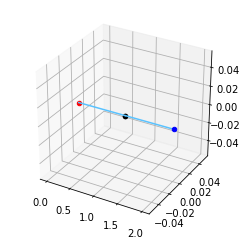

In [108]:
world.draw_graph()

In [109]:
texpgr = TimeExpandedFlowGraph(world)

Creating w0 time 0 is auxiliary and w'0 time 0 is auxiliary
Creating w1 time 0 is auxiliary and w'1 time 0 is auxiliary
Creating w0 time 1 is auxiliary and w'0 time 1 is auxiliary
Creating w1 time 1 is auxiliary and w'1 time 1 is auxiliary


In [110]:
texpgr.print_flow_graph()

For node:  [0, 0, 0] is start
[0, 0, 0] is start  ->  w0 time 0 is auxiliary
[0, 0, 0] is start  ->  [0, 0, 0] is auxiliary
w0 time 0 is auxiliary  ->  w'0 time 0 is auxiliary
[0, 0, 0] is auxiliary  ->  [0, 0, 0] is start
w'0 time 0 is auxiliary  ->  [0, 0, 0] is auxiliary
w'0 time 0 is auxiliary  ->  [1, 0, 0] is auxiliary
[0, 0, 0] is start  ->  w0 time 1 is auxiliary
[0, 0, 0] is start  ->  [0, 0, 0] is auxiliary
[1, 0, 0] is auxiliary  ->  [1, 0, 0] is default
w0 time 1 is auxiliary  ->  w'0 time 1 is auxiliary
[0, 0, 0] is auxiliary  ->  [0, 0, 0] is start
[1, 0, 0] is default  ->  w0 time 1 is auxiliary
[1, 0, 0] is default  ->  [1, 0, 0] is auxiliary
w'0 time 1 is auxiliary  ->  [0, 0, 0] is auxiliary
w'0 time 1 is auxiliary  ->  [1, 0, 0] is auxiliary
[1, 0, 0] is auxiliary  ->  [1, 0, 0] is default
For node:  [1, 0, 0] is default
[1, 0, 0] is default  ->  w0 time 0 is auxiliary
[1, 0, 0] is default  ->  [1, 0, 0] is auxiliary
[1, 0, 0] is default  ->  w1 time 0 is auxiliary
w

In [ ]:
import math

In [ ]:
if 1 < math.inf:
    print("lol")

In [3]:
if 1 < math.inf:
    print("lol")

lol


In [4]:
import numpy as np
a = np.array([0, 1, 1])
b = np.array([1, 0, 0])
c = np.array([0, 0, 0])
print(np.linalg.norm(abs(a - b)))

1.7320508075688772


In [16]:
vel = (a - b) / np.linalg.norm(a - b)
print(np.linalg.norm(vel * 0.5))
c = c + vel * 0.5
print(vel)
print(c)

0.5
[-0.57735027  0.57735027  0.57735027]
[-1.73205081  1.73205081  1.73205081]
